In [1]:
import os
import subprocess
import pandas as pd
import numpy as np

In [3]:
drought_df = pd.read_csv('drought_data.csv')
drought_df.head() 

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [4]:
drought_df.shape

(19300680, 21)

In [5]:
drought_df = drought_df.dropna()

In [7]:
drought_df.shape

(2756796, 21)

In [8]:
drought_df.isna().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [9]:
drought_df['score'] = drought_df['score'].round().astype(int)
drought_df['date'] = pd.to_datetime(drought_df['date'])

df_v1 = drought_df[drought_df['date'].dt.year <= 2008]

print("Shape of version 1 data: ", df_v1.shape)
print("Shape of version 2 data: ", drought_df.shape)

Shape of version 1 data:  (1460760, 21)
Shape of version 2 data:  (2756796, 21)


<Axes: xlabel='score'>

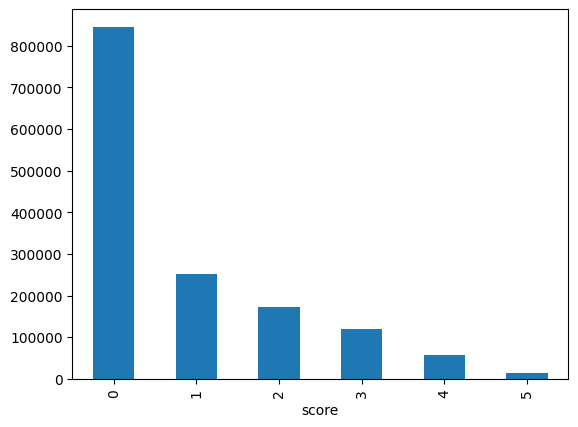

In [10]:
df_v1['score'].value_counts().plot(kind='bar')

In [11]:
df_v1.to_csv("drought_data_v1.csv",index=False)